In [1]:
import matplotlib
import warnings
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size' : 16})
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
df_cum = pd.read_excel('/Users/liqinglin/Desktop/python/cumcm2018c1.xlsx')

In [3]:
df_cum.head()

,会员卡号,出生日期,性别,登记时间
0,c68b20b4,2002-11-02 00:00:00,0.0,2013-05-11 00:00:00.000
1,1ca15332,NaN,0.0,2004-11-04 16:31:52.436
2,a37cc182,1967-02-17 00:00:00,0.0,2004-12-31 21:24:34.216
3,2ab88539,1982-06-01 00:00:00,0.0,2010-11-19 00:00:00.000
4,b4c77269,1964-02-05 00:00:00,0.0,2007-12-14 00:00:00.000


In [89]:
df_sale = pd.read_csv('/Users/liqinglin/Desktop/python/cumcm2018c2.csv', encoding = 'utf8')
df_sale

,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,290.0,270.20,兰芝化妆品正价瓶,270.20,6,25bb,8077.0,兰芝柜
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,325.0,302.80,兰芝化妆品正价瓶,302.80,6,25bb,8077.0,兰芝柜
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,195.0,181.80,兰芝化妆品正价瓶,181.80,6,25bb,8077.0,兰芝柜
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,270.0,251.55,兰芝化妆品正价瓶,251.55,6,25bb,8077.0,兰芝柜
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2,245.0,456.55,兰芝化妆品正价瓶,456.55,6,25bb,8077.0,兰芝柜
...,...,...,...,...,...,...,...,...,...,...,...,...
1893527,607c7cde,2018-01-03 21:38:15.343,c483e08b,1,200.0,200.00,植村秀眉笔4g,200.00,91,3d84,8156.0,Shu Uemura
1893528,220c0564,2018-01-03 21:41:53.140,cd93b1ca,1,1.0,1.00,爱慕内衣正价件,1.00,264,7cd8,4332.0,Aimer
1893529,220c0564,2018-01-03 21:41:53.140,cd93b1ca,1,490.0,490.00,爱慕内衣正价件,490.00,264,7cd8,4332.0,Aimer
1893530,220c0564,2018-01-03 21:41:53.140,cd93b1ca,1,280.0,280.00,爱慕内衣正价件,280.00,264,7cd8,4332.0,Aimer


In [8]:
print('会员信息表一共有{}行记录，{}列字段' .format(df_cum.shape[0],df_cum.shape[1]))

会员信息表一共有194760行记录，4列字段


In [15]:
print('数据缺失的情况为：\n{}'.format(df_cum.isnull().mean())）


SyntaxError: invalid character in identifier (<ipython-input-15-300728ee7aa7>, line 1)

In [12]:
print('会员卡号（不重复）有{}条记录'.format(df_cum['会员卡号'].nunique()))

会员卡号（不重复）有194754条记录


In [13]:
print('数据缺失的情况为：\n{}'.format(df_cum.isnull().mean()))

数据缺失的情况为：
会员卡号    0.000000
出生日期    0.175539
性别      0.048444
登记时间    0.065126
dtype: float64


In [20]:
print('数据缺失的情况为：\n{}'.format(df_cum.isnull().sum()))

数据缺失的情况为：
会员卡号        0
出生日期    34188
性别       9435
登记时间    12684
dtype: int64


In [21]:
df_cum.drop_duplicates(subset='会员卡号',inplace=True)

In [26]:
df_cum.dropna(subset=['登记时间'],inplace=True)

In [29]:
df_cum['性别'].mode().values[0]

0.0

In [31]:
df_cum['性别'].fillna(df_cum['性别'].mode().values[0],inplace=True)

In [32]:
df_cum.isnull().mean()

会员卡号    0.000000
出生日期    0.151568
性别      0.000000
登记时间    0.000000
dtype: float64

In [34]:
df=df_cum['登记时间']+pd.Timedelta(days=1)

In [56]:
df=df_cum['出生日期']+pd.Timedelta(days=1)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 9690-01-20 00:00:00

In [42]:
L=pd.DataFrame(df_cum.loc[df_cum['出生日期'].notnull(),['出生日期', '性别']])
L['年龄']=L['出生日期'].astype(str).str[0:3]+'0'

In [43]:
L.drop('出生日期',inplace=True,axis=1)

In [45]:
L['年龄'].value_counts()

1980    47142
1970    43407
1960    26678
1750    16748
1990    11811
1950     7078
1940      893
2010      370
2000      139
1930      110
1920       32
1900       21
1910        8
1880        4
1860        3
1890        3
5220        2
1850        2
1760        2
1870        2
9740        1
1770        1
8400        1
8900        1
5010        1
8500        1
9880        1
1820        1
9690        1
6200        1
9820        1
8700        1
2640        1
9790        1
2190        1
1780        1
5190        1
1790        1
7710        1
Name: 年龄, dtype: int64

In [47]:
L['年龄']=L['年龄'].astype(int)

In [53]:
L.loc[(L['年龄']>1920)&(L['年龄']<2020)]

,性别,年龄
0,0.0,2000
2,0.0,1960
3,0.0,1980
4,0.0,1960
5,1.0,1960
...,...,...
194749,1.0,1990
194751,1.0,1970
194752,1.0,1980
194758,0.0,1970


In [54]:
condition = "年龄 >= 1920 and 年龄 <= 2020"
L=L.query(condition)

In [55]:
L.index = range(L.shape[0])
L['年龄'].value_counts()

1980    47142
1970    43407
1960    26678
1990    11811
1950     7078
1940      893
2010      370
2000      139
1930      110
1920       32
Name: 年龄, dtype: int64

In [58]:
df_cum.drop('出生日期',axis=1,inplace=True)

In [60]:
df_cum.reset_index(inplace=True)

In [63]:
df_sale.columns

Index(['会员卡号', '消费产生的时间', '商品编码', '销售数量', '商品售价', '消费金额', '商品名称', '此次消费的会员积分',
       '收银机号', '单据号', '柜组编码', '柜组名称'],
      dtype='object')

In [64]:
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893532 entries, 0 to 1893531
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   会员卡号       object 
 1   消费产生的时间    object 
 2   商品编码       object 
 3   销售数量       int64  
 4   商品售价       float64
 5   消费金额       float64
 6   商品名称       object 
 7   此次消费的会员积分  float64
 8   收银机号       int64  
 9   单据号        object 
 10  柜组编码       float64
 11  柜组名称       object 
dtypes: float64(4), int64(2), object(6)
memory usage: 173.4+ MB


In [69]:
print('{} {} {}'.format(len(df_sale['销售数量']>0),df_sale.shape[0],len(df_sale['销售数量'] > 0) == df_sale.shape[0]))

1893532 1893532 True


In [71]:
df_sale.isnull().sum()

会员卡号         1017486
消费产生的时间            0
商品编码               0
销售数量               0
商品售价               0
消费金额               0
商品名称               0
此次消费的会员积分    1017486
收银机号               0
单据号                0
柜组编码         1017486
柜组名称         1036956
dtype: int64

In [90]:
df_sale_clearn=df_sale.dropna(subset=['会员卡号'])
df_sale.isnull().sum()

会员卡号         1017486
消费产生的时间            0
商品编码               0
销售数量               0
商品售价               0
消费金额               0
商品名称               0
此次消费的会员积分    1017486
收银机号               0
单据号                0
柜组编码         1017486
柜组名称         1036956
dtype: int64

In [91]:
df_sale_clearn.drop(['收银机号', '柜组编码', '柜组名称'],axis=1,inplace=True)

In [92]:
df_sale_clearn.index=range(df_sale_clearn.shape[0])

In [93]:
df=pd.merge(df_sale_clearn,df_cum,on=['会员卡号'],how='left')

In [94]:
df.head()

,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,单据号,index,性别,登记时间
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,290.0,270.20,兰芝化妆品正价瓶,270.20,25bb,NaN,NaN,NaT
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,325.0,302.80,兰芝化妆品正价瓶,302.80,25bb,NaN,NaN,NaT
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,195.0,181.80,兰芝化妆品正价瓶,181.80,25bb,NaN,NaN,NaT
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,270.0,251.55,兰芝化妆品正价瓶,251.55,25bb,NaN,NaN,NaT
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2,245.0,456.55,兰芝化妆品正价瓶,456.55,25bb,NaN,NaN,NaT


In [95]:
index1 = df['消费金额'] > 0
index2 = df['此次消费的会员积分'] > 0
index3 = df['销售数量'] > 0

In [96]:
df1=df.loc[index1&index2&index3]

In [97]:
df1.reset_index(inplace=True)

In [98]:
df1.shape

(738462, 13)

In [102]:
df1['会员']=1
df1.loc[df['性别'].isnull(),'会员']=0

In [103]:
df1.head()

,level_0,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,单据号,index,性别,登记时间,会员
0,0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,290.0,270.20,兰芝化妆品正价瓶,270.20,25bb,NaN,NaN,NaT,0
1,1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,325.0,302.80,兰芝化妆品正价瓶,302.80,25bb,NaN,NaN,NaT,0
2,2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,195.0,181.80,兰芝化妆品正价瓶,181.80,25bb,NaN,NaN,NaT,0
3,3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,270.0,251.55,兰芝化妆品正价瓶,251.55,25bb,NaN,NaN,NaT,0
4,4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2,245.0,456.55,兰芝化妆品正价瓶,456.55,25bb,NaN,NaN,NaT,0


In [104]:
L['性别']=L['性别'].apply(lambda x: '男' if x==1 else '女')

In [105]:
sex_sort=L['性别'].value_counts()

In [106]:
sex_sort

女    108283
男     29377
Name: 性别, dtype: int64

In [107]:
L['年龄段'] = pd.cut(L['年龄'],[1920,1951,1990,2020],labels=['老年','中年','青年'],right=False)

In [109]:
res = L['年龄段'].value_counts()

Text(0.5, 1.0, '会员的男女比例')

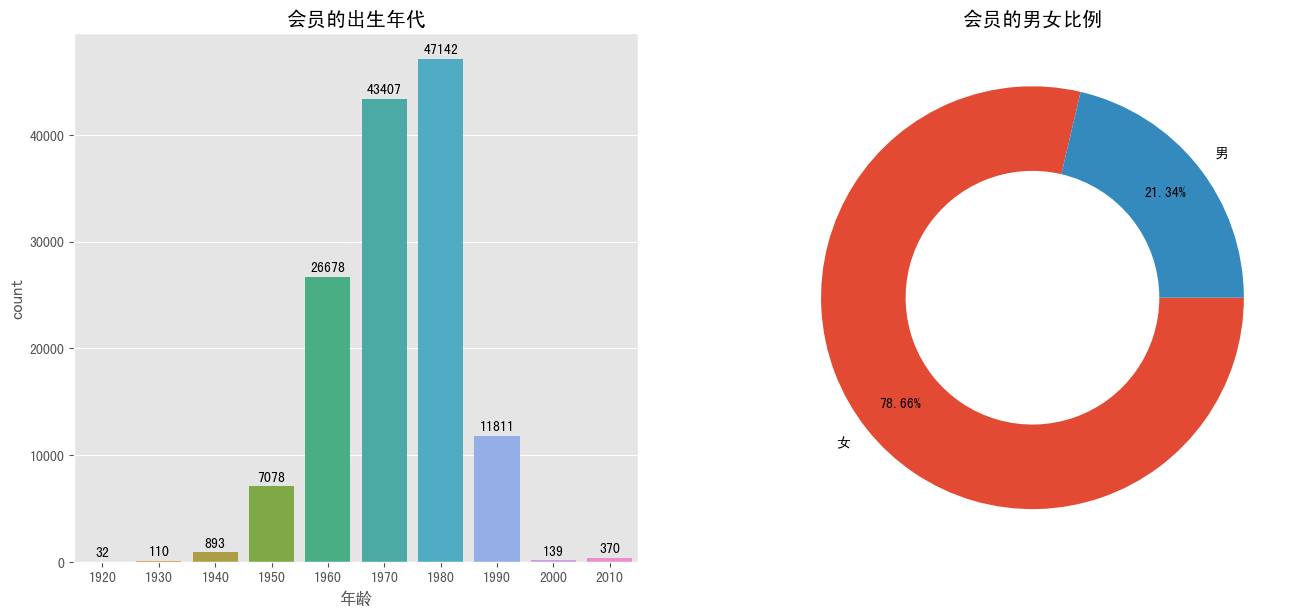

In [112]:
# 使用上述预处理后的数据集L，包含两个字段，分别是“年龄”和“性别”，先画出年龄的条形图
fig, axs = plt.subplots(1, 2, figsize = (16, 7), dpi = 100)
# 绘制条形图
ax = sns.countplot(x = '年龄', data = L, ax = axs[0])
# 设置数字标签
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width() / 2), y = height + 500, s = '{:.0f}'.format(height), ha = 'center')
axs[0].set_title('会员的出生年代')
# 绘制饼图
axs[1].pie(sex_sort, labels = sex_sort.index, wedgeprops = {'width': 0.4}, counterclock = False, autopct = '%.2f%%', pctdistance = 0.8)
axs[1].set_title('会员的男女比例')
#plt.savefig('./会员出生年代及男女比例情况.png')

Text(0.5, 1.0, '会员的年龄分布')

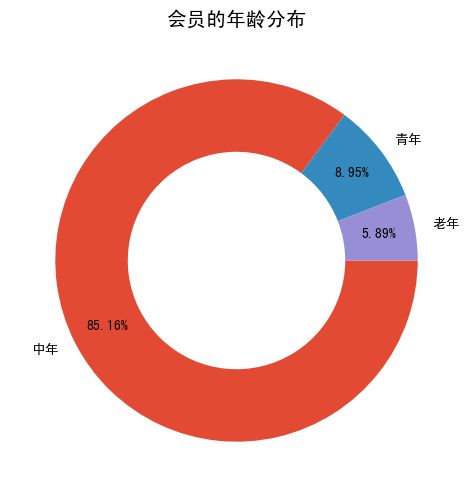

In [113]:
# 绘制各个年龄段的饼图
plt.figure(figsize = (8, 6), dpi = 100)
plt.pie(res.values, labels = ['中年', '青年', '老年'], autopct = '%.2f%%', pctdistance = 0.8, 
        counterclock = False, wedgeprops = {'width': 0.4})
plt.title('会员的年龄分布')
#plt.savefig('./会员的年龄分布.png')

Text(0.5, 1.0, '总消费金额占比')

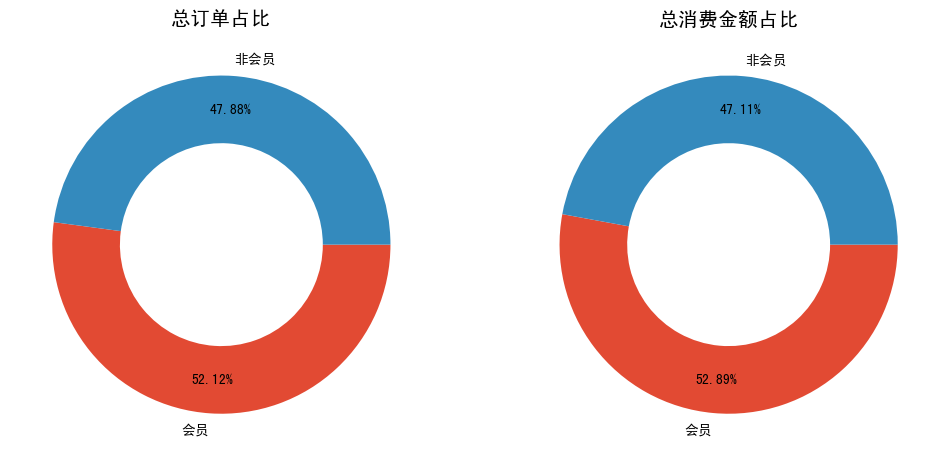

In [114]:
fig, axs = plt.subplots(1, 2, figsize = (12, 7), dpi = 100)
axs[0].pie([len(df1.loc[df1['会员'] == 1, '消费产生的时间'].unique()), len(df1.loc[df1['会员'] == 0, '消费产生的时间'].unique())],
          labels = ['会员', '非会员'], wedgeprops = {'width': 0.4}, counterclock = False, autopct = '%.2f%%', pctdistance = 0.8)
axs[0].set_title('总订单占比')
axs[1].pie([df1.loc[df1['会员'] == 1, '消费金额'].sum(), df1.loc[df1['会员'] == 0, '消费金额'].sum()], 
          labels = ['会员', '非会员'], wedgeprops = {'width': 0.4}, counterclock = False, autopct = '%.2f%%', pctdistance = 0.8)
axs[1].set_title('总消费金额占比')
#plt.savefig('./总订单和总消费占比情况.png')

In [121]:
df_vip=df1.dropna()

df_vip.reset_index(inplace=True,)
df_vip.info()

ValueError: cannot insert level_0, already exists

In [129]:
df_vip.drop(columns=['level_0'],inplace=True)

In [130]:
df_vip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393482 entries, 10 to 738457
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   会员卡号       393482 non-null  object        
 1   消费产生的时间    393482 non-null  object        
 2   商品编码       393482 non-null  object        
 3   销售数量       393482 non-null  int64         
 4   商品售价       393482 non-null  float64       
 5   消费金额       393482 non-null  float64       
 6   商品名称       393482 non-null  object        
 7   此次消费的会员积分  393482 non-null  float64       
 8   单据号        393482 non-null  object        
 9   index      393482 non-null  float64       
 10  性别         393482 non-null  float64       
 11  登记时间       393482 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 49.0+ MB


In [131]:
df_vip['消费产生的时间']=pd.to_datetime(df_vip['消费产生的时间'])
df_vip['年']=df_vip['消费产生的时间'].dt.year

In [132]:
df_vip['季度']=df_vip['消费产生的时间'].dt.quarter
df_vip['月']=df_vip['消费产生的时间'].dt.month
df_vip['天']=df_vip['消费产生的时间'].dt.day

In [158]:
df_vip_q=df_vip.groupby('季度')['消费产生的时间'].nunique()

In [140]:
quarters_list=df_vip_q.values/3

In [152]:
quarters_list=np.round(quarters_list,2)

array([17226.  , 19886.  , 15874.  , 18015.33])

In [ ]:
quarters_list=quarters_list.tolist()

In [155]:
quarters_list

[17226.0, 19886.0, 15874.0, 18015.33]

In [156]:
df_vip_d=df_vip.groupby('天')['消费产生的时间'].nunique()
days_list=df_vip_q.values/36
days_list=np.round(days_list,2)
days_list=days_list.tolist()

In [157]:
order_list= [quarters_list, days_list]

In [159]:
df_vip_d=df_vip.groupby('天')['消费产生的时间'].nunique()

In [160]:
time_list=[df_vip_q.index,df_vip_d.index]

In [161]:
time_list

[Int64Index([1, 2, 3, 4], dtype='int64', name='季度'),
 Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
             18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
            dtype='int64', name='天')]

In [163]:
maxindex_list = [quarters_list.index(max(quarters_list)), days_list.index(max(days_list))]

季度的均值消费偏好最优的时间为: 2	 对应的均值消费订单数为: 19886.0
天数的均值消费偏好最优的时间为: 26	 对应的均值消费订单数为: 350.86


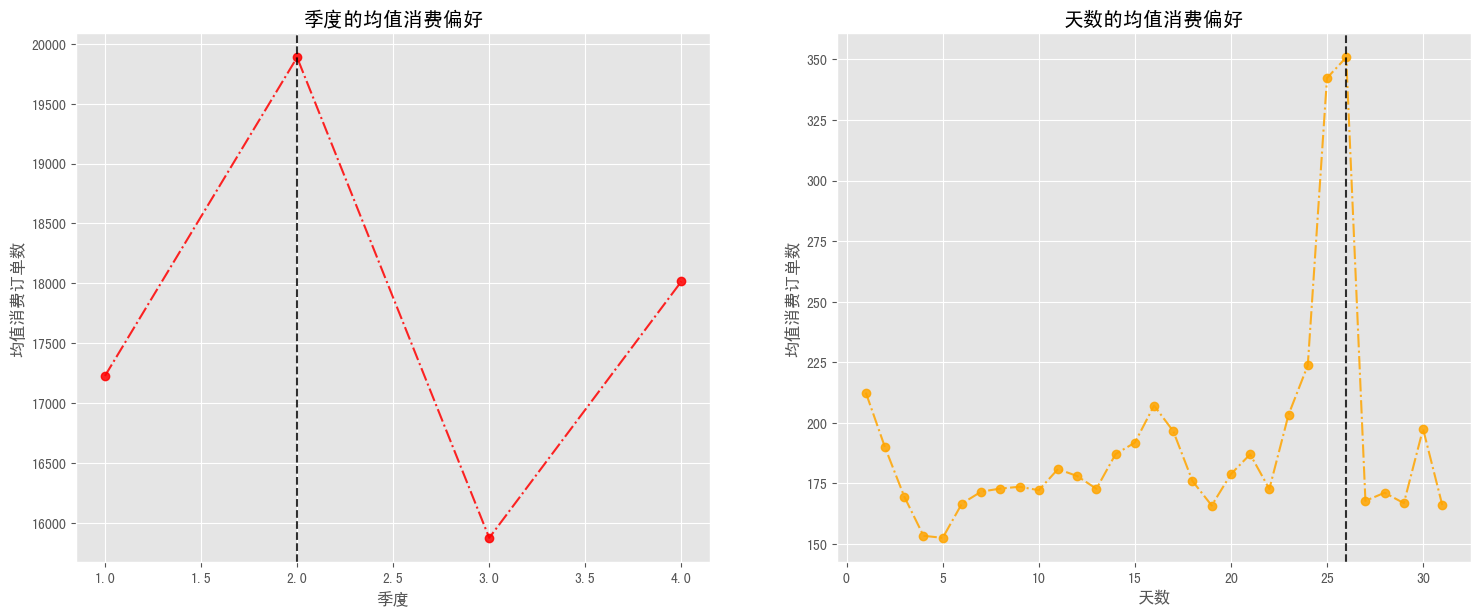

In [164]:
fig, axs = plt.subplots(1, 2, figsize = (18, 7), dpi = 100)
colors = np.random.choice(['r', 'g', 'b', 'orange', 'y'], replace = False, size = len(axs))
titles = ['季度的均值消费偏好', '天数的均值消费偏好']
labels = ['季度', '天数']
for i in range(len(axs)):
    ax = axs[i]
    ax.plot(time_list[i], order_list[i], linestyle = '-.', c = colors[i], marker = 'o', alpha = 0.85)
    ax.axvline(x = time_list[i][maxindex_list[i]], linestyle = '--', c = 'k', alpha = 0.8)
    ax.set_title(titles[i])
    ax.set_xlabel(labels[i])
    ax.set_ylabel('均值消费订单数')
    print(f'{titles[i]}最优的时间为: {time_list[i][maxindex_list[i]]}\t 对应的均值消费订单数为: {order_list[i][maxindex_list[i]]}')
#plt.savefig('./季度和天数的均值消费偏好情况.png')

In [168]:
df_every_q=pd.pivot_table(index='年',columns='季度',data=df_vip,values='消费产生的时间',aggfunc='nunique')

In [208]:
df_every_q

季度,1,2,3,4
年,,,,
2015,23239.0,17801.0,10296.0,36.0
2016,5573.0,18500.0,18753.0,24384.0
2017,21632.0,23357.0,18573.0,29626.0
2018,1234.0,NaN,NaN,NaN


In [209]:
from pyecharts.charts import *
from pyecharts import options as opts



def line_with_custom_linestyle():
    line = Line(init_opts=opts.InitOpts(theme='light',
                                        width='1000px',
                                        height='600px'))
    line.add_xaxis(['1','2','3','4'])
    line.add_yaxis('2015',
                  [23239.0, 17801.0, 10296.0, 36.0],
                   linestyle_opts=opts.LineStyleOpts(width=2,
                                                     curve=0,
                                                     opacity=0.7,
                                                     type_='solid',
                                                     color='red')
                   )
    line.add_yaxis('2016',
                   df_every_q.loc[2016].tolist(),
                   linestyle_opts=opts.LineStyleOpts(width=2,
                                                     curve=0.5,
                                                     opacity=0.9,
                                                     type_='solid',
                                                     color='black')
                   )
    line.add_yaxis('2017',
                   df_every_q.loc[2017].tolist(),
                   linestyle_opts=opts.LineStyleOpts(width=2,
                                                     curve=1,
                                                     opacity=0.9,
                                                     type_='solid',
                                                     color='green')
                   )
    return line


chart = line_with_custom_linestyle()
chart.render_notebook()

In [195]:
df_every_q.columns.tolist()

[1, 2, 3, 4]

In [192]:
df_every_q.loc[2015].tolist()

[23239.0, 17801.0, 10296.0, 36.0]

In [211]:
df_every_d=pd.pivot_table(index='年',columns='天',data=df_vip,values='消费产生的时间',aggfunc='nunique')

In [219]:
def line_with_custom_linestyle():
    line = Line(init_opts=opts.InitOpts(theme='light',
                                        width='1000px',
                                        height='600px'))
    line.add_xaxis(df_every_d.columns.astype(str).tolist())
    line.add_yaxis('2015',
                  df_every_d.loc[2015].tolist(),
                   linestyle_opts=opts.LineStyleOpts(width=2,
                                                     curve=0,
                                                     opacity=0.7,
                                                     type_='solid',
                                                     )
                   )
    line.add_yaxis('2016',
                   df_every_d.loc[2016].tolist(),
                   linestyle_opts=opts.LineStyleOpts(width=2,
                                                     curve=0.5,
                                                     opacity=0.9,
                                                     type_='solid',
                                                     )
                   )
    line.add_yaxis('2017',
                   df_every_q.loc[2017].tolist(),
                   linestyle_opts=opts.LineStyleOpts(width=2,
                                                     curve=1,
                                                     opacity=0.9,
                                                     type_='solid',
                                                     )
                   
                   )
    return line


chart = line_with_custom_linestyle()
chart.render_notebook()

In [224]:
df_vip['时间']=df_vip['消费产生的时间'].dt.hour

In [228]:
df_vip.drop('index',inplace=True,axis=1)

In [229]:
df_vip.reset_index(inplace=True,drop=True)

In [234]:
df_vip.rename(columns={'年':'年份'},inplace=True)

In [239]:
df_vip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393482 entries, 0 to 393481
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   会员卡号       393482 non-null  object 
 1   消费产生的时间    393482 non-null  object 
 2   商品编码       393482 non-null  object 
 3   销售数量       393482 non-null  int64  
 4   商品售价       393482 non-null  float64
 5   消费金额       393482 non-null  float64
 6   商品名称       393482 non-null  object 
 7   此次消费的会员积分  393482 non-null  float64
 8   单据号        393482 non-null  object 
 9   性别         393482 non-null  float64
 10  登记时间       393482 non-null  object 
 11  年份         393482 non-null  int64  
 12  季度         393482 non-null  int64  
 13  月          393482 non-null  int64  
 14  天          393482 non-null  int64  
 15  时间         393482 non-null  int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 48.0+ MB


In [237]:
print('消费产生的时间存在异常值的数量为：{}\t登记时间存在的异常值数量为：{}'.format(len(df_vip[df_vip['消费产生的时间'] >= '2018-01-03']), 
                                                     len(df_vip[df_vip['登记时间'] >= '2018-01-03'])))

消费产生的时间存在异常值的数量为：469	登记时间存在的异常值数量为：36


In [238]:
df_vip.to_csv('./vip_info.csv', encoding = 'gb18030', index = None)
df_vip = pd.read_csv('./vip_info.csv', encoding = 'gbk')

In [240]:
index1 = df_vip['消费产生的时间'] < '2018-01-03'
index2 = df_vip['登记时间'] < '2018-01-03'
df_vip = df_vip[index1 & index2]
df_vip.index = range(df_vip.shape[0])
print('筛除全部异常值之后数据的记录数为：{}\t共有{}个字段'.format(df_vip.shape[0], df_vip.shape[1]))

筛除全部异常值之后数据的记录数为：393006	共有16个字段


In [242]:
# 自定义一个函数来实现两列数据时间相减
def time_minus(df, end_time):
    """
    df: 为DataFrame形式，有列数据，第一列为“会员卡号”，第二列为被减的时间
    end_time: 结束时间
    """
    df.columns = ['A', 'B']
    df['C'] = end_time
    l = pd.to_datetime(df['C']) - pd.to_datetime(df['B'])
    l = l.apply(lambda x: str(x).split(' ')[0])
    l = l.astype(int) / 30
    return l

In [247]:
from datetime import datetime

In [243]:
# 开始登记的时间
df_L = df_vip.groupby('会员卡号')['登记时间'].agg(lambda x: x.values[-1]).reset_index()
# 最后一次消费的时间
df_R = df_vip.groupby('会员卡号')['消费产生的时间'].agg(lambda x: x.values[-1]).reset_index()

In [255]:
L1=df_vip.groupby('会员卡号')['登记时间'].agg(lambda x: datetime(2018,1,3)-pd.to_datetime(x.values[-1])).reset_index()

In [265]:

(L1['登记时间'].dt.days)/30

0         23.933333
1        107.066667
2         52.300000
3         56.066667
4         18.200000
            ...    
42543      9.333333
42544      1.166667
42545     57.433333
42546     80.966667
42547     33.133333
Name: 登记时间, Length: 42548, dtype: float64

In [244]:
# 调用函数，end_time为“2018-1-3”
end_time = '2018-1-3'
L = time_minus(df_L, end_time)
R = time_minus(df_R, end_time)

In [245]:
L

0         23.933333
1        107.066667
2         52.300000
3         56.066667
4         18.200000
            ...    
42543      9.333333
42544      1.166667
42545     57.433333
42546     80.966667
42547     33.133333
Length: 42548, dtype: float64

In [267]:
F=df_vip.groupby('会员卡号')['消费产生的时间'].nunique().reset_index(drop=True)
M=df_vip.groupby('会员卡号')['消费金额'].sum().reset_index(drop=True)
P=df_vip.groupby('会员卡号')['此次消费的会员积分'].sum().reset_index(drop=True)

In [268]:
F1 = df_vip.groupby('会员卡号')['消费产生的时间'].agg(lambda x: len(np.unique(x.values))).reset_index(drop = True)

In [270]:
F


0         2
1         7
2        10
3         1
4         1
         ..
42543     1
42544     1
42545     2
42546    12
42547     3
Name: 消费产生的时间, Length: 42548, dtype: int64

In [271]:
F1

0         2
1         7
2        10
3         1
4         1
         ..
42543     1
42544     1
42545     2
42546    12
42547     3
Name: 消费产生的时间, Length: 42548, dtype: int64

In [272]:
df_vip['消费时间偏好'] = df_vip['时间'].apply(lambda x: '晚上' if x >= 18 else '下午' if x >= 14 else '中午' 
                                      if x >= 11 else '上午' if x >= 6 else '凌晨')

In [274]:
S=df_vip.groupby('会员卡号')['消费时间偏好'].agg(lambda x: x.mode().values[0]).reset_index(drop=True)

In [277]:
X = df_vip.groupby('会员卡号')['性别'].agg(lambda x:  '女' if x.unique()[0]==0  else '男').reset_index(drop=True)

In [301]:
df_i=pd.Series(df_vip['会员卡号'].unique())


In [302]:
df_LRFMPS=pd.concat([df_i, L, R, F, M, P, S, X],axis=1)

In [303]:
df_LRFMPS.columns = ['id', 'L', 'R', 'F', 'M', 'P', 'S', 'X']

In [304]:
df_LRFMPS.to_csv('./LRFMPSX.csv', encoding = 'gb18030', index = None)

In [305]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud

In [306]:
df = pd.read_csv('./LRFMPSX.csv', encoding = 'gbk')
df.head()

,id,L,R,F,M,P,S,X
0,d8d36575,23.933333,13.433333,2,5266.5,5267.0,中午,女
1,8527d4d0,107.066667,2.066667,7,12850.0,11850.0,下午,女
2,586a3339,52.300000,0.566667,10,6340.8,6141.0,上午,女
3,c2477497,56.066667,2.266667,1,8964.0,8964.0,中午,女
4,0706d57c,18.200000,2.066667,1,236.0,236.0,上午,女


In [307]:
print(f'数据集的shape:{df.shape}')
df.isnull().mean()
df.dropna(inplace=True)

数据集的shape:(42548, 8)


In [308]:
df.describe()

,L,R,F,M,P
count,42548.000000,42548.000000,42548.000000,4.254800e+04,4.254800e+04
mean,43.272356,12.748108,5.000917,1.314873e+04,1.166768e+04
std,38.427058,11.415613,9.963993,3.650895e+04,3.293682e+04
min,0.000000,0.000000,1.000000,7.300000e-01,8.100000e-01
25%,11.966667,2.900000,1.000000,1.424820e+03,1.250000e+03
50%,32.133333,9.433333,2.000000,3.885000e+03,3.410000e+03
75%,67.200000,19.433333,5.000000,1.106000e+04,9.345000e+03
max,185.000000,36.566667,287.000000,1.511900e+06,1.413370e+06


In [309]:
# 开始对数据进行分组
"""
L（入会程度）：3个月以下为新用户，4-12个月为中等用户，13个月以上为老用户
R（最近购买的时间）
F（消费频次）：次数20次以上的为高频消费，6-19次为中频消费，5次以下为低频消费
M（消费金额）：10万以上为高等消费，1万-10万为中等消费，1万以下为低等消费
P（消费积分）：10万以上为高等积分用户，1万-10万为中等积分用户，1万以下为低等积分用户
"""
df_profile = pd.DataFrame()
df_profile['会员卡号'] = df['id']
df_profile['性别'] = df['X']
df_profile['消费偏好'] = df['S'].apply(lambda x: '您喜欢在' + str(x) + '时间进行消费')
df_profile['入会程度'] = df['L'].apply(lambda x: '老用户' if int(x) >= 13 else '中等用户' if int(x) >= 4 else '新用户')
df_profile['最近购买的时间'] = df['R'].apply(lambda x: '您最近' + str(int(x) * 30) + '天前进行过一次购物')
df_profile['消费频次'] = df['F'].apply(lambda x: '高频消费' if x >= 20 else '中频消费' if x >= 6 else '低频消费')
df_profile['消费金额'] = df['M'].apply(lambda x: '高等消费用户' if int(x) >= 1e+05 else '中等消费用户' if int(x) >= 1e+04 else '低等消费用户')
df_profile['消费积分'] = df['P'].apply(lambda x: '高等积分用户' if int(x) >= 1e+05 else '中等积分用户' if int(x) >= 1e+04 else '低等积分用户')
df_profile

,会员卡号,性别,消费偏好,入会程度,最近购买的时间,消费频次,消费金额,消费积分
0,d8d36575,女,您喜欢在中午时间进行消费,老用户,您最近390天前进行过一次购物,低频消费,低等消费用户,低等积分用户
1,8527d4d0,女,您喜欢在下午时间进行消费,老用户,您最近60天前进行过一次购物,中频消费,中等消费用户,中等积分用户
2,586a3339,女,您喜欢在上午时间进行消费,老用户,您最近0天前进行过一次购物,中频消费,低等消费用户,低等积分用户
3,c2477497,女,您喜欢在中午时间进行消费,老用户,您最近60天前进行过一次购物,低频消费,低等消费用户,低等积分用户
4,0706d57c,女,您喜欢在上午时间进行消费,老用户,您最近60天前进行过一次购物,低频消费,低等消费用户,低等积分用户
...,...,...,...,...,...,...,...,...
42543,406380bf,女,您喜欢在晚上时间进行消费,中等用户,您最近270天前进行过一次购物,低频消费,低等消费用户,低等积分用户
42544,4f7fa021,女,您喜欢在晚上时间进行消费,新用户,您最近30天前进行过一次购物,低频消费,低等消费用户,低等积分用户
42545,14a60aea,男,您喜欢在晚上时间进行消费,老用户,您最近570天前进行过一次购物,低频消费,低等消费用户,低等积分用户
42546,139ddf73,女,您喜欢在下午时间进行消费,老用户,您最近330天前进行过一次购物,中频消费,中等消费用户,中等积分用户


In [310]:
df_profile[df_profile['会员卡号'] == 'd8d36575'].T.iloc[:, 0].values.tolist()

['d8d36575',
 '女',
 '您喜欢在中午时间进行消费',
 '老用户',
 '您最近390天前进行过一次购物',
 '低频消费',
 '低等消费用户',
 '低等积分用户']

In [311]:
df_profile[df_profile['会员卡号'] == 'd8d36575'].iloc[0, :].values.tolist()

['d8d36575',
 '女',
 '您喜欢在中午时间进行消费',
 '老用户',
 '您最近390天前进行过一次购物',
 '低频消费',
 '低等消费用户',
 '低等积分用户']

In [312]:
df_profile[df_profile['会员卡号'] == 'd8d36575']

,会员卡号,性别,消费偏好,入会程度,最近购买的时间,消费频次,消费金额,消费积分
0,d8d36575,女,您喜欢在中午时间进行消费,老用户,您最近390天前进行过一次购物,低频消费,低等消费用户,低等积分用户


In [323]:
def wc_plot(df, id_label = None):
    """
    df: 为DataFrame的数据集
    id_label: 为输入用户的会员卡号，默认为随机取一个会员进行展示
    """
    myfont = '/System/Library/Fonts/STHeiti Light.ttc'
    if id_label == None:
        id_label = df.loc[np.random.choice(range(df.shape[0])), '会员卡号']
    text = df[df['会员卡号'] == id_label].T.iloc[:, 0].values.tolist()
    plt.figure(dpi = 100)
    wc = WordCloud(font_path = myfont, background_color = 'white', width = 500, height = 400).generate_from_text(' '.join(text))
    plt.imshow(wc)
    plt.axis('off')
    plt.savefig(f'./会员卡号为{id_label}的用户画像.png')
    plt.show()

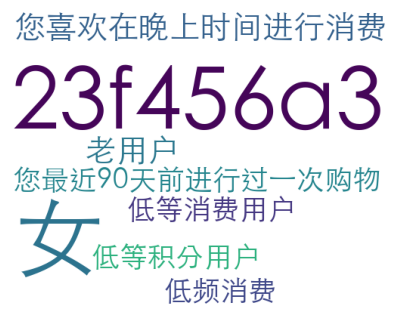

In [327]:
# 调用词云函数来绘制用户画像
wc_plot(df_profile,)

In [328]:
df0 = df.iloc[:, 1:6]
res_std = StandardScaler().fit_transform(df0)